> ### EEE3314: Introduction to Artificial Intelligence

# Assignment V: Adaboost

### *Assignement Instructions:*
- **Due date**: 11 PM, Nov. 12 (Fri), 2021
- **File name**: [ID_Name_HW5.ipynb]
- Write a program implementing a particular algorithm to solve a given problem.   
- **Report and discuss your results. Analyze the algorithm, theoretically and empirically.**

### *Collaboration policy:*
- You may discuss the questions with your friends, but each student writes their own codes and answers.  
- **Cheating is strictly prohibited, and will be considered academic dishonesty. This is not how you want to start your career as an engineer.** We expect that most students can distinguish between helping other students and cheating. Explaining the meaning of a question or discussing a way of approaching a solution is an interaction. But you should write your homework solution strictly by yourself so that your hands and eyes can help you internalize the subject matter. You should acknowledge everyone whom you have worked with, or who has given you any significant ideas about the homework
- Signiture: <span style="color:blue">[Insert your ID HERE] [Insert your name HERE]</span>

In [ ]:
import datetime
print("This code is written at " + str(datetime.datetime.now()))

This code is written at 2021-11-09 15:29:56.651568


In [2]:
%load_ext autoreload
%autoreload 2

## Problem statement

We will use datasets generated from ```sklearn.dataset.make_classification``` and ```sklearn.dataset.make_mooons```. Let's first viaualize the $\texttt{classification}$ and $\texttt{moon}$ datasets with the ```scatter``` function from ```matplotlib.pyplot```.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd '/content/drive/MyDrive/3_2_연대수업/기인지프로젝트/project5'

/content/drive/MyDrive/3_2_연대수업/기인지프로젝트/project5


**Classification dataset**

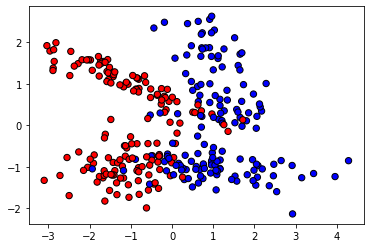

In [4]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_moons
from sklearn.datasets import make_classification


cm_bright = ListedColormap(['#FF0000', '#0000FF'])
X, y = make_classification(n_samples=300, n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=2)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=cm_bright, edgecolors='k')
plt.show()

**Moon dataset**

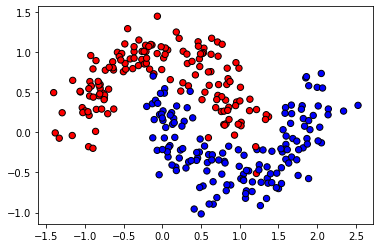

In [5]:
X,y = make_moons(n_samples=300, noise=0.2, random_state=0)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=cm_bright, edgecolors='k')
plt.show()

We will implement the $\texttt{AdaBoost}$ algorithm. It first trains a classifier on an original dataset and then fits additional classifier on the same dataset but with different weights for traing samples. For example, the weights for incorrectly classified samples increases in order to focus more on hard or important cases, and vice versa.

Let's apply $\texttt{AdaBoost}$ these two datasets.

**NOTE**: In $\texttt{DecisionStump}$ and $\texttt{AdaBoost}$ implementation, exploiting ```sklearn.tree``` and ```sklearn.ensemble``` (or equivalent) **will not be allowed**. You will get no credit otherwise.

### P1. AdaBoost

P1.1 Implement a decision stump (```DecisionStump``` class) using the **threshold split selection algorithm**. A decision stump is a one-level decision tree which makes a prediction using a single input feature. (*15 points*)  
> **Quality metric**: Classification error that computes the fraction of mistakes.  
> **Prediction**: For each node, $\hat{y}=\text{major class}.$

*Refer the lecture note 11 p.53-59.*
  
  
P1.2 Implement an adaboost (```AdaBoost``` class) for binary classification. Note that the AdaBoost algorithm uses a **weighted sampling with replacement** to learn the weak classifier $f_{t}(\mathbf{x})$ with data weights $\alpha$. (*50 points*)  
> **Weighted sampling with data weight**: This samples data points from the original dataset with corresponding sampling probabilities (i.e., weights for individual training samples).
>> For example, let's suppose the following data points $\mathbf{x}$ and corresponding weights $\alpha$: $\mathbf{x}=[x_1, x_2, x_3]$ and $\alpha = [0.1, 0.6, 0.3]$. In the weighted sampling procedure, $x_1$, $x_2$, and $x_3$ are chosen with probabilities of $0.1$, $0.6$, and $0.3$, respectively. That is, the data point with a higher weight is more likely to be chosen.
>  
> **Quality metric**: Classification error that computes the fraction of mistakes.  
> **Compute coefficient**: $\hat{w}_t = \frac{1}{2} \ln \left( \frac{1 - \epsilon_t}{\epsilon_t} \right)$  
> **Recompute weight**: $\alpha_{t+1}^{i} = \alpha_{t}^{i} e^{{-\hat{w}_{t} y_{i} f_{t}(\mathbf{x})}}$ , where $y_{i} = 1 \text{or} -1$.  
> **Normalize weight**: $\alpha_{t}^{i} = \frac{\alpha_{t}^{i}}{\sum_{i=1}^{N} \alpha_{t}^{i}}$  
> **Prediction**: $\hat{\mathbf{y}}=\text{sign} \left( \sum_{t=1}^{T} \hat{w_t} f_t(\mathbf{x}) \right)$  
> **Save weak classifier**: Use ```dictionary```, i.e., {```'coefficient'```: $\hat{w}_t$, ```'classifier'```: $f_t(\mathbf{x})$}. Then append the dictionary to the attribute list (```self.classifiers```).  

*Refer the lecture note 12 p.35-37.*

P1.3 Run the code provied to plot the weighted error and the coefficient of each classifier. Analyze the results and relationship between the weighted errors and the coefficients. (*5 points*)  

P1.4 Implement the ```compute_staged_accuracies``` function that inputs boosted classifiers (i.e., a list of dictionary that contains 'coefficient' and 'classifier' as keys), a training dataset, a test dataset, and outputs the prediction accuracies on training and test datasets. Plot the accuracies on training and testing samples, over the number of classiferes. Use the $\frac{\text{number of correct predictions}}{\text{total number of samples}}$ to compute the accuracy. (*5 points*)



### P2. Results Analysis

P2.1 Analyze and contrast the logistic regression and adaboost in terms of objective functions and how to optimize the weights of features in logistic regression and coefficients of weak classifiers in adaboost, theoretically. (*5 points*)

P2.2 Run the code provied to compute train and test accuracies of each classification method. Analyze and contrast the classification methods (logistic regression, decision stump, decision tree, and boosted decision tree) in terms of train and test accuracies. (*10 points*)

P2.3 Run the code provied to plot decision boundaries and prediction accuracies on test dataset. Analyze and contrast the decision boundaries of the classification methods (logistic regression, decision tree, and boosted decision tree). (*10 points*)

---

## Results

In [6]:
from copy import deepcopy

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import sklearn.datasets
from sklearn.model_selection import train_test_split

from project5 import *

### Prepare Dataset

In [7]:
X, y = make_classification(n_samples=400, n_features=15, n_redundant=0, n_informative=12, random_state=1, n_clusters_per_class=2)
y[y == 0] = -1

n_split = 250

X_train, X_test = X[:n_split], X[n_split:]
y_train, y_test = y[:n_split], y[n_split:]

In [8]:
print(X_train.shape)
print(X_test.shape)

(250, 15)
(150, 15)


---

### P1.1

In [9]:
stump = DecisionStump()
stump.fit(X_train, y_train)

print(f"train: {np.average(stump.predict(X_train) == y_train)}, test: {np.average(stump.predict(X_test) == y_test)}")

train: 0.728, test: 0.7333333333333333


In [10]:
stump.left_prediction

1

In [11]:
stump.right_prediction

-1

In [12]:
stump.threshold

0.4554753275916111

In [13]:
stump.selected_feature

2

---

### P1.2

In [14]:
adaboost_classifier = AdaBoost(100)
adaboost_classifier.fit(X_train, y_train)

print(f"train: {np.average(adaboost_classifier.predict(X_train) == y_train)}, test: {np.average(adaboost_classifier.predict(X_test) == y_test)}")

train: 0.956, test: 0.8666666666666667


In [15]:
classifiers = adaboost_classifier.classifiers
print(len(classifiers))
print(classifiers[0].keys())
print(classifiers[0].values())

100
dict_keys(['coefficient', 'classifier'])
dict_values([0.4922494909503443, <project5.DecisionStump object at 0x7fdec46b8210>])


In [16]:
adaboost_classifier.error_history

[0.272,
 0.35399159663865604,
 0.3292387861107545,
 0.4001661175920667,
 0.392254405833183,
 0.41605588644867475,
 0.38083154982389406,
 0.36836177726601554,
 0.3653335061035335,
 0.339198669519132,
 0.3783285360791782,
 0.37264915158733863,
 0.35380461095820676,
 0.43890427793453046,
 0.4307276180358724,
 0.40761756756764245,
 0.4130868171311753,
 0.4081429166753145,
 0.4095349296912519,
 0.4587850697073662,
 0.4185427330164294,
 0.42692418745586064,
 0.41884509490772465,
 0.4423621241009772,
 0.43033623560787077,
 0.46877823405630825,
 0.4230763726451527,
 0.37327420448952026,
 0.4452310978294351,
 0.4065502222075061,
 0.456326308664031,
 0.4024511920891763,
 0.4166114551070525,
 0.4380644347165299,
 0.4074820198142728,
 0.45696383124157575,
 0.421164802001029,
 0.4270253958935694,
 0.4156251311364344,
 0.4472161143142961,
 0.4463402087356805,
 0.4502777845542229,
 0.4182669226032745,
 0.42098981103525157,
 0.434089464328057,
 0.4311436555198678,
 0.4101847864671188,
 0.4572405644754

In [17]:
coefficients = [classifier['coefficient'] for classifier in adaboost_classifier.classifiers]
    
coefficients

[0.4922494909503443,
 0.3007696687270769,
 0.3558149632226001,
 0.2023864996758451,
 0.21892286999796245,
 0.16949284430624517,
 0.2430101087529549,
 0.2696256261065653,
 0.2761445013551694,
 0.3334336270712377,
 0.24832439947133808,
 0.2604342931780502,
 0.3011785517791755,
 0.12280508747131022,
 0.13944155445095868,
 0.18691151330357297,
 0.17560956366814526,
 0.18582389669948235,
 0.18294414155198796,
 0.08261732031268203,
 0.16437924351279457,
 0.14720578277211363,
 0.16375809484997647,
 0.11579047592227738,
 0.140239726671039,
 0.06252488212160277,
 0.15507859170325705,
 0.25909791749847766,
 0.10997908310737194,
 0.18912256042331801,
 0.08757054600183004,
 0.19763106986697931,
 0.16834969852662368,
 0.12451059000923373,
 0.18719220515078386,
 0.08628584148826977,
 0.15899679708146122,
 0.14699895409036043,
 0.17037947435601536,
 0.1059625833438977,
 0.10773447091546966,
 0.0997741982451887,
 0.16494595653982363,
 0.1593557216831535,
 0.1325926748322288,
 0.138593295026296,
 0.181

In [18]:
adaboost_classifier.data_weight

array([1.35146825e-04, 2.34558172e-03, 9.12224566e-04, 1.84555353e-02,
       9.95309480e-03, 9.79871028e-03, 4.86997110e-04, 7.47505028e-04,
       5.53833818e-04, 2.17941992e-03, 1.59994600e-03, 6.71986392e-04,
       2.89369881e-03, 8.49776521e-04, 6.00310962e-03, 1.65168781e-03,
       7.62727136e-04, 7.20229204e-04, 7.11250518e-03, 1.99047520e-02,
       1.28774632e-02, 1.59347776e-02, 1.06018197e-03, 2.13352886e-03,
       4.83283403e-03, 9.40300348e-03, 8.26584391e-04, 1.37113812e-03,
       1.31019783e-02, 3.73217332e-03, 3.46075272e-03, 7.00823488e-03,
       7.24775795e-05, 2.62405439e-03, 5.59818449e-03, 6.30961572e-03,
       1.19309534e-03, 2.03710290e-03, 3.44957758e-04, 1.46008732e-04,
       6.47566402e-03, 7.34204781e-03, 1.84965604e-03, 1.14425992e-03,
       7.88580145e-04, 1.66459387e-04, 5.53659333e-03, 1.03741774e-02,
       1.43847046e-02, 9.71036858e-03, 1.46565856e-02, 9.29309721e-04,
       1.78365328e-04, 2.75538002e-04, 4.89209718e-03, 2.88429601e-03,
      

---

### P1.3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


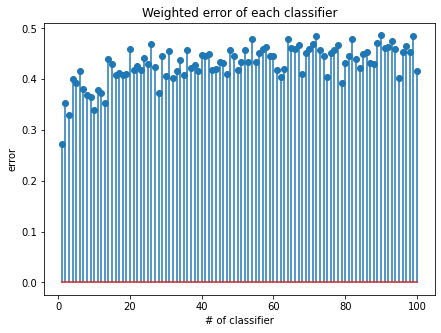

In [19]:
plt.figure(figsize=[7, 5])

plt.stem(range(1, len(adaboost_classifier.error_history)+1), adaboost_classifier.error_history)
plt.title('Weighted error of each classifier')
plt.xlabel('# of classifier')
plt.ylabel('error')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


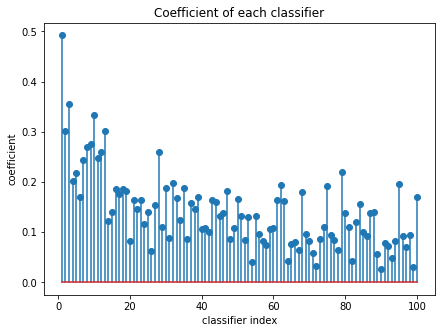

In [20]:
plt.figure(figsize=[7, 5])

plt.stem(range(1, len(coefficients)+1), coefficients)
plt.title('Coefficient of each classifier')
plt.xlabel('classifier index')
plt.ylabel('coefficient')
plt.show()

**Analyze the results and relationship between the weighted errors and the coefficients**


* plot에서 직관적으로 weighted errors와 coefficients를 확인하였을 때 반비례하는 것을 확인할 수 있다.
* coefficient는 $\hat{w}_t = \frac{1}{2} \ln \left( \frac{1 - \epsilon_t}{\epsilon_t} \right)$으로 구할 수 있다. 이때, ${\epsilon_t}$는 weighted errors이다.
* 반비례 관계는 weighted errors에 따른 coefficient를 plot하여 확인해 볼 수 있다.

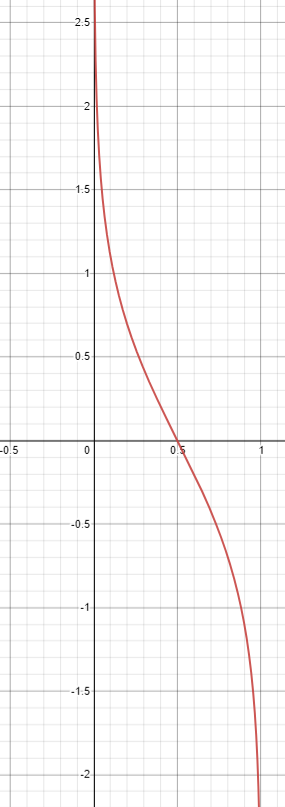

---

### P1.4

In [21]:
classifiers = adaboost_classifier.classifiers    

acc_train, acc_test = compute_staged_accuracies(classifiers, X_train, y_train, X_test, y_test)

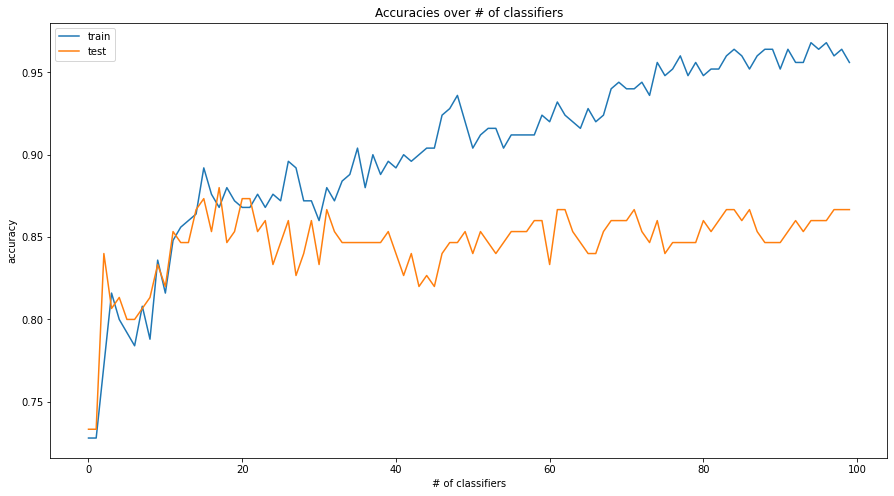

In [22]:
plt.figure(figsize=[15, 8])

plt.plot(acc_train, label='train')
plt.plot(acc_test, label='test')
plt.title('Accuracies over # of classifiers')
plt.xlabel('# of classifiers')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [23]:
adaboost_classifier = AdaBoost(500)
adaboost_classifier.fit(X_train, y_train)

In [24]:
classifiers = adaboost_classifier.classifiers    

acc_train, acc_test = compute_staged_accuracies(classifiers, X_train, y_train, X_test, y_test)

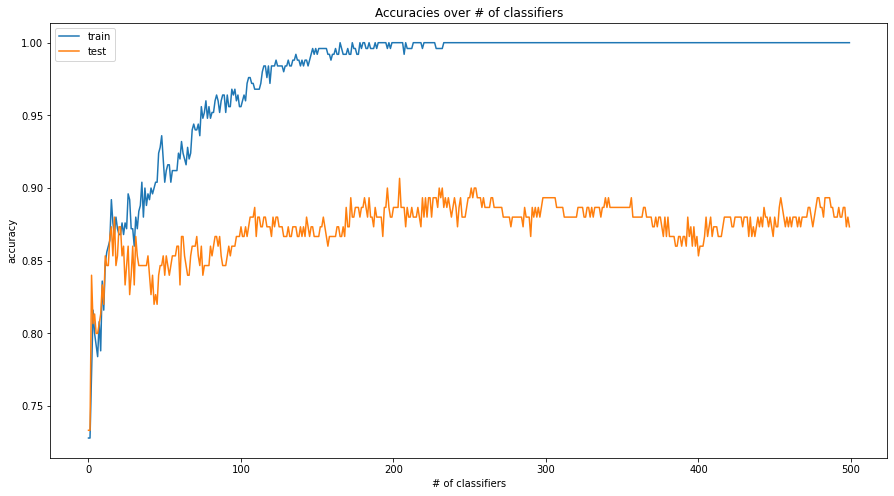

In [25]:
plt.figure(figsize=[15, 8])

plt.plot(acc_train, label='train')
plt.plot(acc_test, label='test')
plt.title('Accuracies over # of classifiers')
plt.xlabel('# of classifiers')
plt.ylabel('accuracy')
plt.legend()
plt.show()

**Staged Accuracy**

*   accuracy의 그래프를 반대로 뒤집었을 때(1-accuracy)의 그래프는 error를 의미한다. 이때, training error가 exponential하게 감소하는 것을 알 수 있다.
*   classifier가 많아질 수록 overfitting되고 training error error가 0이될 수 있다(accuracy가 1이될 수 있다). 이는, 모든 classifier의 weighted error가 0.5보다 작다는 것이다.
*   추가적으로 boosting의 방법은 weighted error가 0.5보다 작다는 조건을 만족시키지 못하여도 훌륭한 training error를 산출할 수 있다.
*   또한 test data의 accuracy가 classifier가 늘어남에도 크게 떨어지지 않는 것으로 보아 ada boost는 overfitting에 강인한 것을 확인할 수 있다.

---

### P2.1 

Analyze and contrast the logistic regression and adaboost in terms of objective functions and how to optimize the weights of features in logistic regression and coefficients of weak classifiers in adaboost, theoretically


*   logistic regression와 adaboost는 loss function을 minimize하는 것은 동일하지만 함수의 형태가 다르다.</br>
 - logistic regression : $\left( \sum_{i=1}^{N} \ln \left(1 + exp(-score(\mathbf{x}))\right) \right)$ / $score = \sum_{j} \hat{w_j}h_j(\mathbf{x})$
 - Boosting : $\frac{1}{N} \left( \sum_{i=1}^{N} exp(-y_iscore(\mathbf{x})) \right)$ / $score = \sum_{t} \hat{w_t}f_t(\mathbf{x})$
*  logistic regression은 여러 독립 변수의 영향을 이해하는 데 유용할 것이다. 
*  두 함수를 optimaize하는 과정에서 logistic regression에 비해 Boosting은 예측을 잘못한 데이터에 더 많은 penalty를 가하여 그 부분에 더 집중한다.
* 또한 score 함수에서 $h_j(\mathbf{x})$는 이미 정해진 feature를 의미하며, $f_t(\mathbf{x})$는 iteration마다 새로 생겨나는 Decision stump로,  logistic regression는 weight를 구할 때, 한 번에 구하는 반면 Boosting의 coefficient는 step by step 방식으로 iteration마다 하나씩 구한다.


---

### P2.2

**Decision Stump**

In [26]:
stump = DecisionStump()
stump.fit(X_train, y_train)
print(f"train: {np.average(stump.predict(X_train) == y_train)}, test: {np.average(stump.predict(X_test) == y_test)}")

train: 0.728, test: 0.7333333333333333


**Decision Tree**

In [27]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print(f"train: {np.average(tree.predict(X_train) == y_train)}, test: {np.average(tree.predict(X_test) == y_test)}")

train: 1.0, test: 0.7733333333333333


**Logisitc Regression**

In [28]:
from sklearn.linear_model import LogisticRegression

regrssor = LogisticRegression()
regrssor.fit(X_train, y_train)
print(f"train: {np.average(regrssor.predict(X_train) == y_train)}, test: {np.average(regrssor.predict(X_test) == y_test)}")

train: 0.82, test: 0.84


**Adaboost**

In [29]:
print(f"train: {np.average(adaboost_classifier.predict(X_train) == y_train)}, test: {np.average(adaboost_classifier.predict(X_test) == y_test)}")

train: 1.0, test: 0.8733333333333333


Analyze and contrast the classification methods (logistic regression, decision stump, decision tree, and boosted decision tree) in terms of train and test accuracies



*   Decision Stump보다 더 많은 Depth를 두어 classification을 하는 것은 Decision Tree이고 많은 Decision Stump(weak classifier)를 가지고 classification을 하는 것은 Adaboost이기 때문에 Decision Stump보다 두 methods의 train and test accuracies의 결과가 더 좋은 것을 확인할 수 있다.
*   Decision Tree와 Adaboost의 train accuracy가 매우 높은 것을 확인할 수 있다. 이때, Decision Tree의 train accuracy가 1로 Adaboost의 train accuracy보다 크다. 하지만 Decision Tree의 test accuracy는 Adaboost의 test accuracy보다 작다. 이것으로 확인할 수 있는 것은 Adaboost방식이 Decision Tree보다 overfitting에 강인함을 알 수 있다.
*   Logisitc Regression은 feature에 대한 regularization이 존재하기 떄문에 overconfidence를 막아준다. Decision Tree와 Adaboost와 같이 test accuracy는 좋은 모습을 보여주지만, training error가 상대적으로 낮은 것을 확인할 수 있다





---

### P2.3

**Do not use sklearn implementation of Adaboost.**

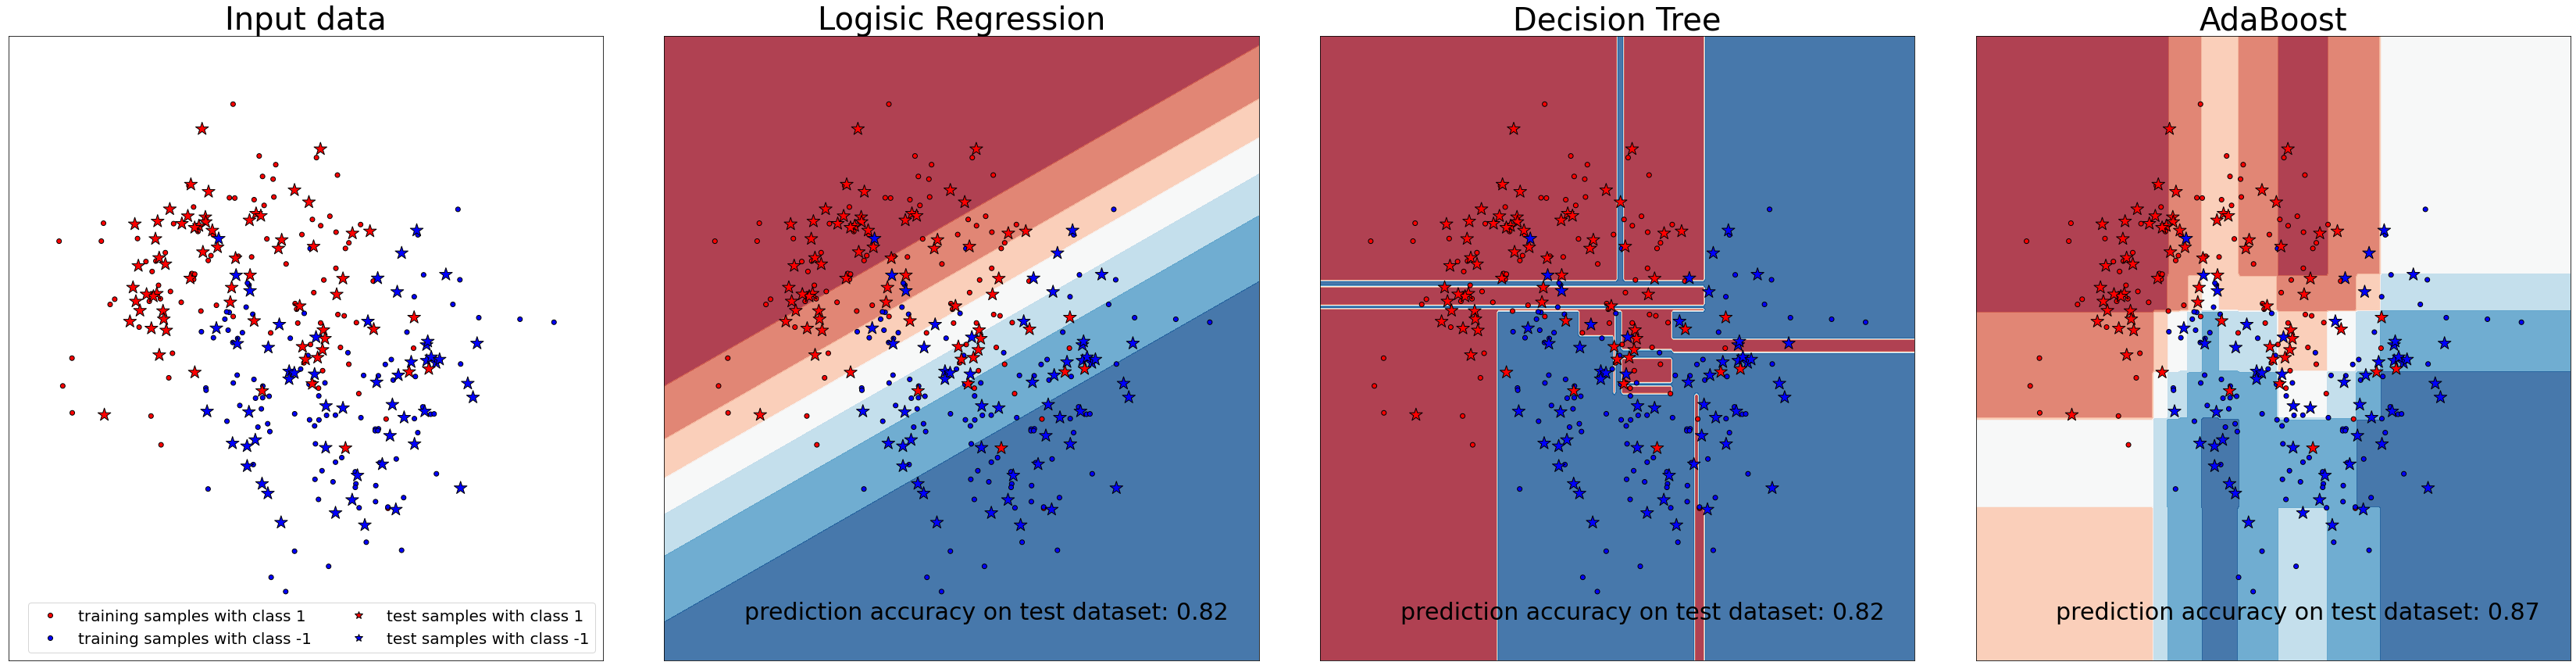

In [30]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

names = ["Logisic Regression", "Decision Tree", "AdaBoost"]


classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    AdaBoost(20) # your implementation.
]

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='training samples with class 1', mfc='#FF0000', mec='k'),
    Line2D([0], [0], marker='o', color='w', label='training samples with class -1', mfc='#0000FF', mec='k'),
    Line2D([0], [0], marker='*', color='w', label='test samples with class 1', mfc='#FF0000', mec='k', ms=10),
    Line2D([0], [0], marker='*', color='w', label='test samples with class -1', mfc='#0000FF', mec='k', ms=10)
]


figure = plt.figure(figsize=(48, 12))
i = 1

# prepare dataset.
X, y = make_moons(n_samples=300, noise=0.4, random_state=0)
y[y == 0] = -1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

# generate meshgrid for decision boundaries.
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# plot.
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

ax = plt.subplot(1, len(classifiers) + 1, 1)
ax.set_title("Input data", size=40)
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k', label='train samples')
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', s=300, marker='*', label='test samples')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.legend(handles=legend_elements, ncol=2, loc='lower right', fontsize=20)
ax.set_xticks(())
ax.set_yticks(())

# iterate over classifiers
i += 1
for name, clf in zip(names, classifiers):
    ax = plt.subplot(1, len(classifiers) + 1, i)
    clf.fit(X_train, y_train)
    score = np.average(clf.predict(X_test) == y_test)
    
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', s=300, marker='*')

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    ax.set_title(name, size=40)
    ax.text(xx.max() - .3, yy.min() + .3, ('prediction accuracy on test dataset: %.2f' % score).lstrip('0'), size=30, horizontalalignment='right')
    i += 1

plt.tight_layout()
plt.show()

Analyze and contrast the decision boundaries of the classification methods (logistic regression, decision tree, and boosted decision tree)



*   logistic regression : hyperplane에서 decision boundary를 통해 prediction을 할 수 있다. 위 logistic regression는 linear한 feature를 이용하여 구분한 모습이다. 또한 logistic regression는 prediction에 대한 confident가 어떤지 확인할 수 있다. confident는 prediction에 대해 얼마나 확신할 수 있는지를 알려준다. (예를들어, 이 식당의 점수로 좋은지 안좋은지를 판단할 때, 각 feature에 weight를 곱하여 모두 더한 후 레스토랑의 score를 구하게 된다. 이 score를 sigmoid function에 대입하여 그 수치를 0~1사이의 값으로 나타낸다. 그렇게 되면 score값 0을 기준으로 confident가 얼마를 나타내는지 확인할 수 있고, 똑같이 좋은 식당이더도 그를 비교할 수 있게된다). score가 0인 지점(decision boundary)은 plot에서 흰색부분을 나타내고 decision boundary에서 멀어질수록 높은 confident를 갖는다.
*   decision tree : decision tree는 NP-hard problem으로 어느 tree가 optimal한 것인지 알 수 없다. quality metric을 정하여 feature와 threshold가 정해지고 그 값에 따라 dataset을 나눈다. 이때 learning 과정은 Greedy하게 tree가 결정된다. 순간순간 새로운 node를 결정할 떄 quality metric에서 가장 좋은 지표를 보여주는 feature와 threshold가 결정된다는 것이다. 이 과정이 recursion을 통해 반복되며 depth가 점점 깊어진다. decision tree는 overfitting을 막기위해 stopping condition을 설정해주어야한다. 정해지는 feature와 threshold에 대해 dataset가 나눠지기 때문에 그 확률값을 파악하기 힘들다.
*   boosted decision tree : boosting은 weak classifier의 잘못 맞춘 데이터에 초점을 맞추어 그 데이터가 뽑힐 확률을 늘리며 그 데이터를 바탕으로 새로운 weak classifier를 생성하며 각각의 classifier마다 coefficient를 두어 모델을 생성한다.classifier마다 가지고 있는 coefficient를 모두 더하여 구간을 나누기 때문에 어느정도의 확률을 가지고 prediction이 되었는지 plot에서 쉽게 파악할 수 있다.

